In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from final_project_code import FinalProject 
from final_project_code import Newton_Raphson 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
# from sklearn.metrics.pairwise import rbf_kernel
FP = FinalProject()

In [34]:
Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_4008/139095848.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [35]:
df = Rvss[['id', 'Form', 'FoundingYear',
       'Province', 'Region', 'Industry', 'OntheSide', 'Age', 'TaxedActivity',
       'YEAR', 'SubindustryCode', 'STCAP', 'Revenue',
       'TotalWorkers', 'TotalPower', 'GrandTotalWorkers', 'RevperWorker',
       'PowerperWorker', 'RevperGrandWorker', 'PowerperGrandWorker',
       'logRevperWorker', 'logPowerperWorker', 'logRevperGrandWorker',
       'logPowerperGrandWorker', 'logRev', 'logWorkers', 'logPower',
       'RegIndGroup', 'RegIndYearGroup', 'ProvIndGroup', 'ProvIndYearGroup',
       'IndYearGroup', 'IndustryFactor', 'ProvinceFactor', 'YearFactor',
       'AKTS', 'PAI', 'factory_id', 'FormNextYear', 'FormNextNextYear',
       'FactoryisCorpin1894', 'FormNextYearin1894', 'FactoryisCorpin1900',
       'FormNextYearin1900', 'FactoryisCorpin1908', 'NEWDEV', 'SHARES',
       'STPRICE', 'BONDS', 'Silk', 'Flax', 'Animal', 'Wool', 'Cotton',
       'MixedMaterials', 'Wood', 'Paper', 'MetalsandMachines', 'Foods',
       'Chemical', 'Mineral']]

In [36]:
df = FP.create_balanced_data(df)
# df = df.sample(n=10000, replace=False)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [37]:
FP = FinalProject()
train, validate, test = FP.split_data(df)

In [38]:
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

In [39]:
cols=['TotalWorkers','TotalPower']
# RegionCoded is not generated here
cols = ["RegionCoded", "FactoryisCorpin1900", "NEWDEV"]
cols = cols[1:]
print(cols)

['FactoryisCorpin1900', 'NEWDEV']


In [40]:

cols = ['PowerperWorker', 'RevperGrandWorker']
cols = ['logWorkers', 'logPower']
X_train = X_train.fillna(0)
print(X_train[cols].shape)
beta_old = np.ones((X_train[cols].shape[1],1))
print(beta_old.shape)

(2871, 2)
(2, 1)


In [41]:
X_train = X_train[cols]
X_train = X_train.to_numpy()

In [42]:
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(2871, 1)


In [63]:
from final_project_code import Newton_Raphson
NR = Newton_Raphson() 
alpha = np.array(0.001)
NR.regress(y_train, X_train, alpha)

MemoryError: Unable to allocate 494. TiB for an array with shape (8242641, 8242641) and data type float64

In [44]:
# NR.beta = NR.beta.to_numpy()

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


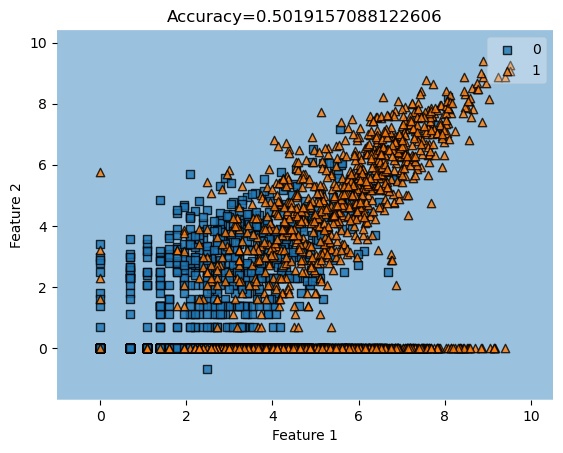

In [45]:
y_train = y_train.reshape(-1)
plot_decision_regions(X_train, y_train, clf=NR
                    #   filler_feature_values={2:value},
                    #   filler_feature_ranges={2:width}
                      )
mypredict = NR.predict(X_train)
title = plt.gca().set(title=f"Accuracy={(mypredict==y_train).mean()}",
                      xlabel="Feature 1",
                      ylabel="Feature 2")

In [60]:
LR = LogisticRegression(solver="newton-cg")
LR.fit(X_train, y_train, alpha)
LR.coef_

array([[0.50158576, 0.14676502]])

In [61]:
LR.score(X_train, y_train)

0.7965865552072449

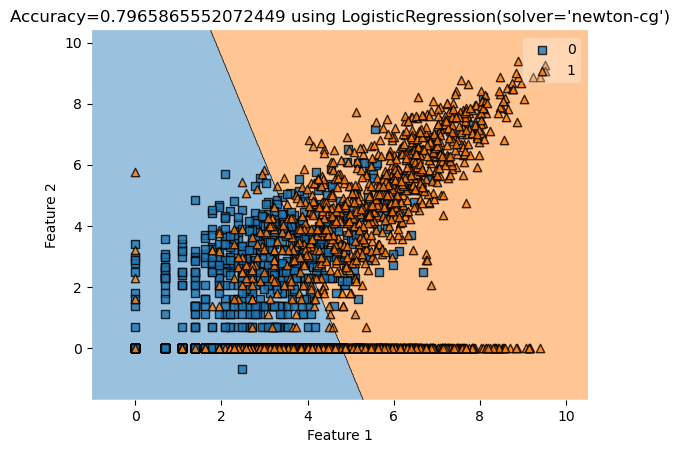

In [62]:
NR.simple_plot(LR, X_train, y_train)

In [49]:
mySVC = SVC(kernel="sigmoid", gamma="auto", shrinking=False)
mySVC.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid', shrinking=False)

KeyboardInterrupt: 

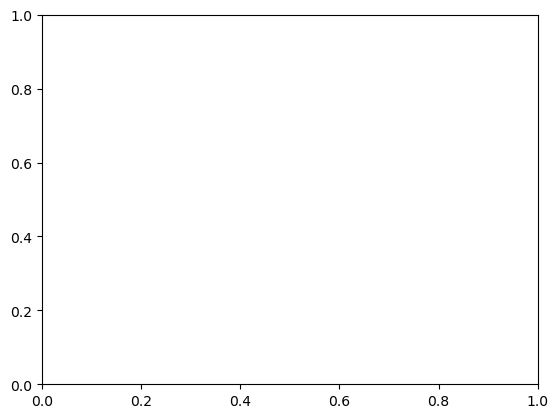

In [50]:
from final_project_code import Newton_Raphson 
NR2 = Newton_Raphson()
NR2.simple_plot(model = mySVC, X = X_train, y = y_train)
print("SVC")

In [51]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train, y_train)
DTree.score(X_train, y_train)

0.9157088122605364

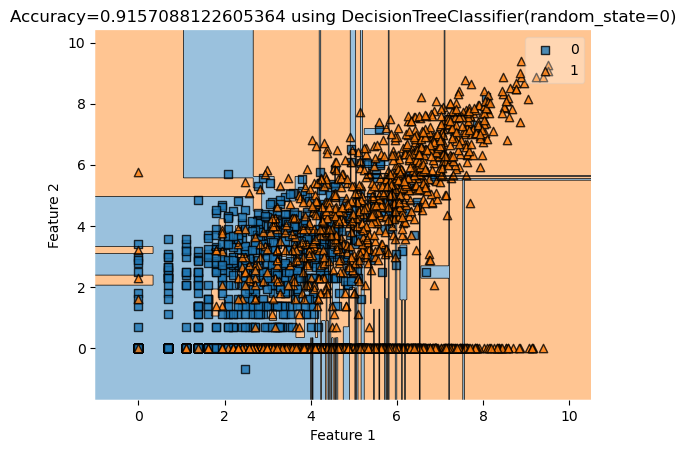

In [54]:
NR2.simple_plot(DTree, X_train, y_train)

In [55]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest.score(X_train, y_train)

0.9157088122605364

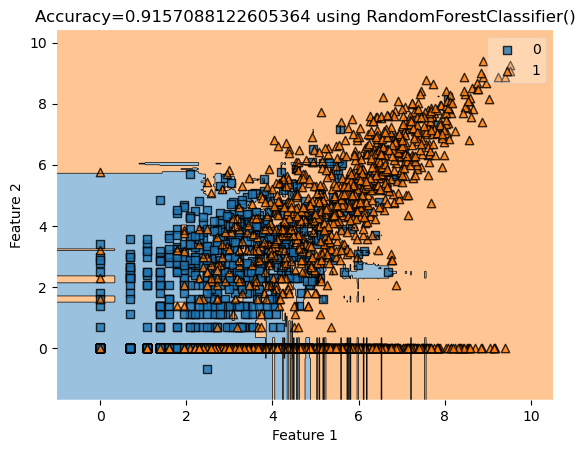

In [56]:
NR2.simple_plot(RandomForest, X_train, y_train)

In [57]:
SVC2 = SVC(kernel="linear", gamma = "auto", shrinking=False)

In [58]:
SVC2.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', shrinking=False)

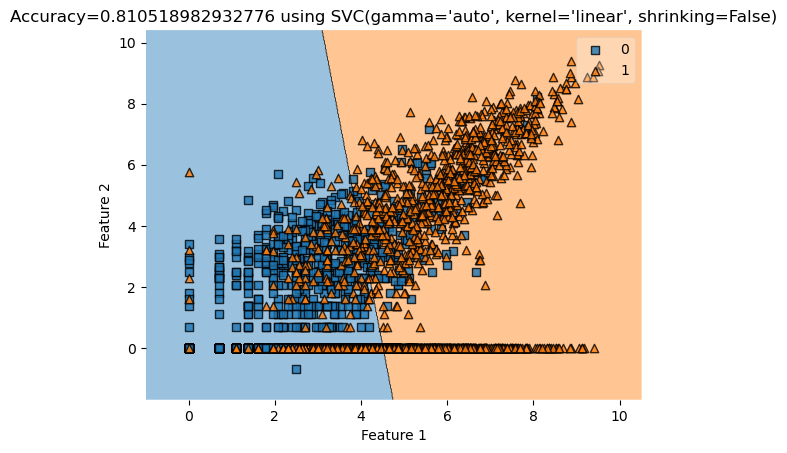

In [59]:
NR2.simple_plot(SVC2, X_train, y_train)

In [ ]:
X_train.shape